# Apple iOS App Store Ratings Prediction

## Preparing for the dataset

#### Import data as pd.DataFrame

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.simplefilter('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn as mg

In [3]:
data = pd.read_csv('AppleStore.csv')

In [4]:
data.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
Unnamed: 0          7197 non-null int64
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
dtypes: float64(3), int64(9), object(5)
memory usage: 955.9+ KB


In [6]:
data.describe()

,Unnamed: 0,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7197.000000,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,4759.069612,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,3093.625213,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,1.000000,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,2090.000000,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,4380.000000,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,7223.000000,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,11097.000000,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


#### Revert key features into Numerical

For some key features which are not numerical, we would check their possible values for reverting them into numerical data, which is necessary for the predictions.

In [7]:
np.unique(data['currency'])
np.unique(data['prime_genre'])
np.unique(data['cont_rating'])

array(['USD'], dtype=object)

array(['Book', 'Business', 'Catalogs', 'Education', 'Entertainment',
       'Finance', 'Food & Drink', 'Games', 'Health & Fitness',
       'Lifestyle', 'Medical', 'Music', 'Navigation', 'News',
       'Photo & Video', 'Productivity', 'Reference', 'Shopping',
       'Social Networking', 'Sports', 'Travel', 'Utilities', 'Weather'],
      dtype=object)

array(['12+', '17+', '4+', '9+'], dtype=object)

It seems that USD is the only currency type in this dataset so that we can just ignore the feature.
For 'prime_genre' and  'cont_rating', we would revert them into numerical data type. 

In [8]:
data['prime_genre'] = data['prime_genre'].map({'Book':1, 'Business':2, 'Catalogs':3, 'Education':4, 'Entertainment':5,'Finance':6, 'Food & Drink':7, 'Games':8, 'Health & Fitness':9,'Lifestyle':10, 'Medical':11, 'Music':12, 'Navigation':13, 'News':14,'Photo & Video':15, 'Productivity':16, 'Reference':17, 'Shopping':18,'Social Networking':19, 'Sports':20, 'Travel':21, 'Utilities':22, 'Weather':23}).astype(int)
data['cont_rating'] = data['cont_rating'].map({'4+': 1, '9+':2, '12+':3, '17+':4}).astype(int)
np.unique(data['prime_genre'])
np.unique(data['cont_rating'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23])

array([1, 2, 3, 4])

#### Revert bytes into MB for apps size

In [9]:
data['size_MB'] = data['size_bytes'] /2**20
data['size_MB'].describe()

count    7197.000000
mean      189.909414
std       342.566408
min         0.562500
25%        44.749023
50%        92.652344
75%       173.497070
max      3839.463867
Name: size_MB, dtype: float64

#### Test the replaceability of latest version for all versions of apps

We noticed that there are ratings data for both latest version and all versions. So we are about to compare the two columns to see if the raitng data of latest version could stands for that of all versions, based on paired t-test method.

In [10]:
from scipy import stats
stats.ttest_rel(data['user_rating'], data['user_rating_ver'])

Ttest_relResult(statistic=20.14354452684445, pvalue=7.816183311408728e-88)

It seems that the rating data for latest version is not significantly same with that of all versions. So for later research we would use data of all versions of apps.

#### Define a more reasonable weighted rating variable

Since the simple average ratings of an app could be significantly affected by the quantity of ratings it received, it is impossiable for us to believe the prediction based on such a variable. Thus, we would define a new weighted variable related to ratings, with the quantity of ratings considered. The method we are using is called shrinkage estimator, which is famous for being used by IMDB to rank their top 250 movies list. We would define our variable as following:

weighted rating (WR) = (Q / (Q+M)) × R + (M / (Q+M)) × C , where:

* R = average of ratings for the apps (mean) = (Ratings)
* Q = quantity of ratings for the app = (Quantity)
* M = minimum ratings required to be considered into prediction(we set it to be 500)
* C = the mean rating across the whole report (3.526956	for the dataset)

In [11]:
R = data['user_rating']
Q = data['rating_count_tot']
M = 500
C = data['user_rating'].mean()

data['rating_w'] = (Q/(Q+M))*R + (M/(Q+M))*C

R_ver = data['user_rating_ver']
Q_ver = data['rating_count_ver']
M_ver = 500
C_ver = data['user_rating_ver'].mean()

data['rating_w_ver'] = (Q_ver/(Q_ver+M_ver))*R_ver + (M_ver/(Q_ver+M_ver))*C_ver

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 20 columns):
Unnamed: 0          7197 non-null int64
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null int32
prime_genre         7197 non-null int32
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
size_MB             7197 non-null float64
rating_w            7197 non-null float64
rating_w_ver        7197 non-null float64
dtypes: float64(6), int32(2), int64(9), object(3)
memory usage: 1.0+ MB


## Regression Analysis

#### Specify the features and labels

In [13]:
data_feature = data[['price', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'size_MB', 'rating_w']]
data_target_R = data[['rating_w_ver']]

#### Split dataset 

In [14]:
from sklearn.model_selection import train_test_split
X_train_unscaled_R , X_test_unscaled_R, y_train_R, y_test_R = train_test_split(data_feature, data_target_R)

#### Data Scaling 

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
scaler_R = StandardScaler()
X_train_R = scaler_R.fit_transform(X_train_unscaled_R)
X_test_R = scaler_R.fit_transform(X_test_unscaled_R)

#### MODEL SELECTION

* KNN Regression
* Simple Linear Regression
* Linear Regression with Ridge
* Linear Regression with Lasso
* Simple Linear Support Vector Machine

##### KNN Regression

In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

knnR = KNeighborsRegressor()
knnR_param_grid = {'n_neighbors':[1, 5, 10, 15, 20]}

grid_knnR = GridSearchCV(knnR, param_grid=knnR_param_grid, cv = 5)

grid_knnR.fit(X_train_R, y_train_R)

grid_knnR.best_params_
grid_knnR.cv_results_['mean_train_score']
grid_knnR.cv_results_['mean_test_score']

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

{'n_neighbors': 20}

array([1.        , 0.51755172, 0.45172443, 0.42371495, 0.40719935])

array([-0.17973232,  0.29021628,  0.33780772,  0.33764112,  0.34397758])

##### Simple Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lreg = LinearRegression()
lreg.fit(X_train_R, y_train_R)

lreg_train_scores = cross_val_score(lreg, X_train_R, y_train_R, cv=5)
lreg_test_scores = cross_val_score(lreg, X_test_R, y_test_R, cv=5)
print("Average cross-validation train score: {:.2f}".format(lreg_train_scores.mean()))
print("Average cross-validation test score: {:.2f}".format(lreg_test_scores.mean()))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Average cross-validation train score: 0.34
Average cross-validation test score: 0.35


##### Linear Regression with Ridge

In [18]:
from  sklearn.linear_model import Ridge

ridge = Ridge()
ridge_param_grid = {'alpha':[0.01, 0.1, 1, 10, 100, 1000]}

grid_ridge = GridSearchCV(ridge, param_grid=ridge_param_grid, cv = 5)

grid_ridge.fit(X_train_R, y_train_R)

grid_ridge.best_params_
grid_ridge.cv_results_['mean_train_score']
grid_ridge.cv_results_['mean_test_score']

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

{'alpha': 10}

array([0.34635314, 0.34635314, 0.34635312, 0.34635118, 0.34616633,
       0.33388994])

array([0.34197102, 0.34197115, 0.34197242, 0.34198336, 0.34192228,
       0.33052548])

##### Linear Regression with Lasso

In [19]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso_param_grid = {'alpha':[0.01, 0.1, 1, 10, 100, 1000]}

grid_lasso = GridSearchCV(lasso, param_grid=lasso_param_grid, cv = 5)

grid_lasso.fit(X_train_R, y_train_R)

grid_lasso.best_params_
grid_lasso.cv_results_['mean_train_score']
grid_lasso.cv_results_['mean_test_score']

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

{'alpha': 0.01}

array([0.33918607, 0.12164916, 0.        , 0.        , 0.        ,
       0.        ])

array([ 0.33702812,  0.1204213 , -0.00127789, -0.00127789, -0.00127789,
       -0.00127789])

##### Simple Linear Support Vector Machine

In [20]:
from sklearn.svm import LinearSVR

svc_lin_R = LinearSVR()
svc_lin_R_param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

grid_svc_lin_R = GridSearchCV(svc_lin_R, svc_lin_R_param_grid, cv = 5)

grid_svc_lin_R.fit(X_train_R, y_train_R)

grid_svc_lin_R.best_params_
grid_svc_lin_R.cv_results_['mean_train_score']
grid_svc_lin_R.cv_results_['mean_test_score']

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

{'C': 1}

array([-0.13264097,  0.17911696,  0.21981234,  0.22189784,  0.1161829 ,
       -0.15388982])

array([-0.1333017 ,  0.1788689 ,  0.21953503,  0.22071379,  0.11020525,
       -0.12140809])

#### Result

Tried all the possible regression models, what performed not as expected is that the training score never reached high enough ---- which means that we can never significantly train a regression model to predict the precise rating score for the latest version of an app using features we currently have. So we have to try the classification.

## Classification

#### Define Binary Dependent Variable

For the weighted ratings variable we get above, we would also make it another binary one for the classification analysis. 

'high_rating_ver' = 
* 1 , if weighted rating is over 3.5 
* 0 , if weighted rating is not

In [13]:
data['high_rating_ver'] = data['rating_w_ver'].map(lambda x : 1 if x >= 3.5 else 0 )

#### Specify the features and labels

In [14]:
data_feature = data[['price', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'size_MB', 'rating_w']]
data_target_C = data[['high_rating_ver']]

#### Test for Balance of Dataset

In [15]:
data_target_C.sum()/data_target_C.count()

high_rating_ver    0.224399
dtype: float64

We cannot believe the result of accuracy since the dataset is extremely imbalanced. In this case we use roc_auc as our evaluation metric.Besides, we still need to define a Stratified k-Fold Cross-Validation for later use in Grid Search, in order to avoid the situation that only one class shows in the roc_auc scoring.

In [16]:
from sklearn.metrics import roc_auc_score

#### Split dataset

In [17]:
from sklearn.model_selection import train_test_split
X_train_unscaled_C , X_test_unscaled_C, y_train_C, y_test_C = train_test_split(data_feature, data_target_C)

#### Data Scaling

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler_C = MinMaxScaler()
X_train_C = scaler_C.fit_transform(X_train_unscaled_C)
X_test_C = scaler_C.fit_transform(X_test_unscaled_C)

#### MODEL SELECTION

* KNN Classification
* Logistic Regression
* Simple Linear Support Vector Machine
* Linear Kernelized SVM
* RBF Kernelized SVM
* Polynomial Kernelized SVM
* Decision Tree
* Random Forest
* AdaBoost
* Gradient Boosting

##### KNN Classfication

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knnC = KNeighborsClassifier()
knnC_param_grid = {'n_neighbors':[10, 20, 30, 40, 50]}

grid_knnC = GridSearchCV(knnC, param_grid=knnC_param_grid, cv=5, scoring='roc_auc')

grid_knnC.fit(X_train_C, y_train_C)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [10, 20, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [35]:
grid_knnC.best_params_
grid_knnC.cv_results_['mean_train_score']
grid_knnC.cv_results_['mean_test_score']

{'n_neighbors': 40}

array([0.92214569, 0.90808472, 0.90036901, 0.89658364, 0.89349612])

array([0.86894705, 0.87772045, 0.87889666, 0.87980513, 0.87957083])

<IPython.core.display.Javascript object>


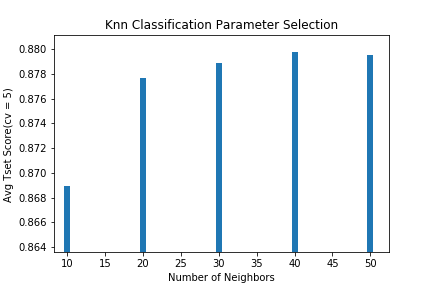

<BarContainer object of 5 artists>

Text(0.5,0,'Number of Neighbors')

Text(0,0.5,'Avg Tset Score(cv = 5) ')

Text(0.5,1,'Knn Classification Parameter Selection')

In [38]:
%matplotlib notebook 
plt.bar(knnC_param_grid['n_neighbors'],grid_knnC.cv_results_['mean_test_score'])
plt.xlabel('Number of Neighbors')
plt.ylabel('Avg Tset Score(cv = 5) ')
plt.title('Knn Classification Parameter Selection')
plt.show()

In [23]:
y_knnC_predict = grid_knnC.predict(X_test_C)
y_knnC_train_predict = grid_knnC.predict(X_train_C)

Text(0.5,1,'knnC Confusion matrix')

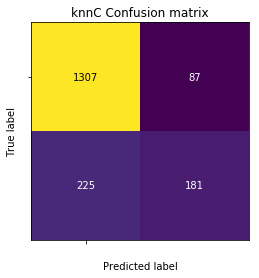

In [39]:
%matplotlib inline
from sklearn.metrics import confusion_matrix

knnC_scores_image = mg.tools.heatmap(confusion_matrix(y_test_C, y_knnC_predict), 
                                     xlabel='Predicted label',ylabel='True label',
                                     xticklabels=' ',yticklabels=' ', 
                                     cmap="viridis", fmt="%d")
plt.title("knnC Confusion matrix")
plt.gca().invert_yaxis()

In [40]:
report_table_knnC = [['knn',grid_knnC.best_params_ , grid_knnC.score(X_train_C, y_train_C), grid_knnC.score(X_test_C, y_test_C), roc_auc_score(y_knnC_train_predict, y_train_C), roc_auc_score(y_knnC_predict, y_test_C) ]]
report_table_knnC

[['knn',
  {'n_neighbors': 40},
  0.8977148661384727,
  0.8889098953290315,
  0.7775324637711686,
  0.7642531467986439]]

##### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg_param_grid = {'C':[0.1, 1, 10, 100, 1000, 10000]}

grid_logreg = GridSearchCV(logreg, logreg_param_grid, cv = 5, scoring='roc_auc')

grid_logreg.fit(X_train_C, y_train_C)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [44]:
grid_logreg.best_params_
grid_logreg.cv_results_['mean_train_score']
grid_logreg.cv_results_['mean_test_score']

{'C': 1000}

array([0.87196445, 0.8843215 , 0.88528745, 0.8853888 , 0.88540387,
       0.88540553])

array([0.8705146 , 0.88287447, 0.88380909, 0.88390729, 0.88393491,
       0.88392995])

<IPython.core.display.Javascript object>


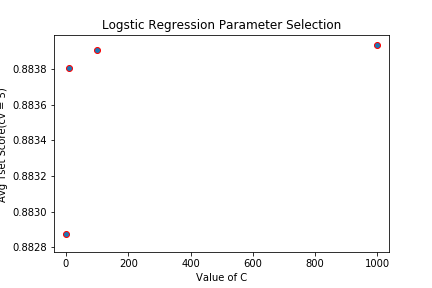

Text(0.5,0,'Value of C')

Text(0,0.5,'Avg Tset Score(cv = 5) ')

Text(0.5,1,'Logstic Regression Parameter Selection')

In [45]:
%matplotlib notebook 
plt.scatter(logreg_param_grid['C'],grid_logreg.cv_results_['mean_test_score'],edgecolors = 'r')
plt.xlabel('Value of C')
plt.ylabel('Avg Tset Score(cv = 5) ')
plt.title('Logstic Regression Parameter Selection')
plt.show()

In [46]:
y_logreg_predict = grid_logreg.predict(X_test_C)
y_logreg_train_predict = grid_logreg.predict(X_train_C)

Text(0.5,1,'logreg Confusion matrix')

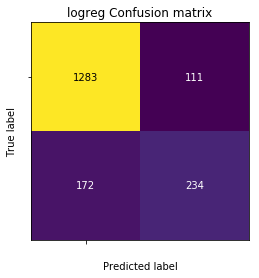

In [47]:
%matplotlib inline
logreg_scores_image = mg.tools.heatmap(confusion_matrix(y_test_C, y_logreg_predict), 
                                       xlabel='Predicted label',ylabel='True label', 
                                       xticklabels=' ',yticklabels=' ',
                                       cmap="viridis", fmt="%d")
plt.title("logreg Confusion matrix")
plt.gca().invert_yaxis()

In [48]:
report_table_logreg = [['Logistic Reg', grid_logreg.best_params_, grid_logreg.score(X_train_C, y_train_C), grid_logreg.score(X_test_C, y_test_C), roc_auc_score(y_logreg_train_predict, y_train_C), roc_auc_score(y_logreg_predict, y_test_C) ]]
report_table_logreg

[['Logistic Reg',
  {'C': 1000},
  0.8854225669781637,
  0.8896219547533057,
  0.7579448442174765,
  0.7800239055729867]]

##### Simple Linear SVM

In [32]:
from sklearn.svm import LinearSVC

svc_lin_C = LinearSVC()
svc_lin_C_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_svc_lin_C = GridSearchCV(svc_lin_C, svc_lin_C_param_grid, cv = 5, scoring='roc_auc')

grid_svc_lin_C.fit(X_train_C, y_train_C)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [33]:
grid_svc_lin_C.best_params_
grid_svc_lin_C.cv_results_['mean_train_score']
grid_svc_lin_C.cv_results_['mean_test_score']

{'C': 10}

array([0.75238825, 0.87404484, 0.8848123 , 0.88571144, 0.88589815,
       0.88522263])

array([0.75011255, 0.87280449, 0.88345501, 0.88414163, 0.8844543 ,
       0.88365293])

<IPython.core.display.Javascript object>


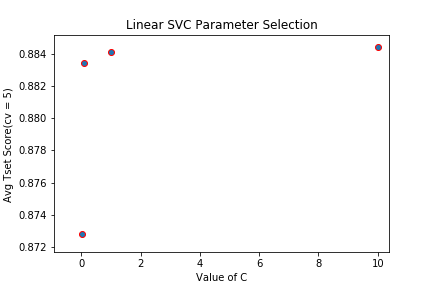

Text(0.5,0,'Value of C')

Text(0,0.5,'Avg Tset Score(cv = 5) ')

Text(0.5,1,'Linear SVC Parameter Selection')

In [49]:
%matplotlib notebook 
plt.scatter(svc_lin_C_param_grid['C'],grid_svc_lin_C.cv_results_['mean_test_score'],edgecolors = 'r')
plt.xlabel('Value of C')
plt.ylabel('Avg Tset Score(cv = 5) ')
plt.title('Linear SVC Parameter Selection')
plt.show()

In [50]:
y_svc_lin_C_predict = grid_svc_lin_C.predict(X_test_C)
y_svc_lin_C_train_predict = grid_svc_lin_C.predict(X_train_C)

Text(0.5,0,'FPR')

Text(0,0.5,'TPR (recall)')

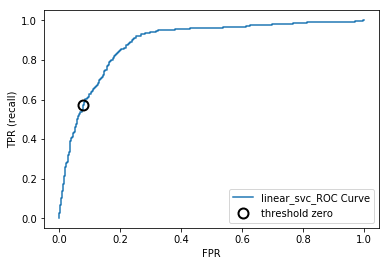

In [51]:
%matplotlib inline
from sklearn.metrics import roc_curve

lin_svc_fpr, lin_svc_tpr, lin_svc_thresholds = roc_curve(y_test_C, grid_svc_lin_C.decision_function(X_test_C))

plt.plot(lin_svc_fpr, lin_svc_tpr, label="linear_svc_ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

lin_svc_close_zero = np.argmin(np.abs(lin_svc_thresholds))
plt.plot(lin_svc_fpr[lin_svc_close_zero], lin_svc_tpr[lin_svc_close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [52]:
report_table_svc_lin_C = [['Linear SVC',grid_svc_lin_C.best_params_, grid_svc_lin_C.score(X_train_C, y_train_C), grid_svc_lin_C.score(X_test_C, y_test_C), roc_auc_score(y_svc_lin_C_train_predict, y_train_C), roc_auc_score(y_svc_lin_C_predict, y_test_C) ]]
report_table_svc_lin_C

[['Linear SVC',
  {'C': 10},
  0.885875829401109,
  0.8864521418323428,
  0.7570390961833616,
  0.7790003210311764]]

##### Linear Kernelized SVM

In [53]:
from sklearn.svm import SVC

svc_l_C = SVC(kernel='linear')
svc_l_C_param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000]}

grid_svc_l_C = GridSearchCV(svc_l_C, svc_l_C_param_grid, cv = 5, scoring='roc_auc')

grid_svc_l_C.fit(X_train_C, y_train_C)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [54]:
grid_svc_l_C.best_params_
grid_svc_l_C.cv_results_['mean_train_score']
grid_svc_l_C.cv_results_['mean_test_score']

{'C': 0.1}

array([0.88420116, 0.88428003, 0.88331173, 0.88302455, 0.8829296 ,
       0.88282698])

array([0.88276073, 0.88287529, 0.88266508, 0.88197865, 0.88190787,
       0.88191481])

<IPython.core.display.Javascript object>


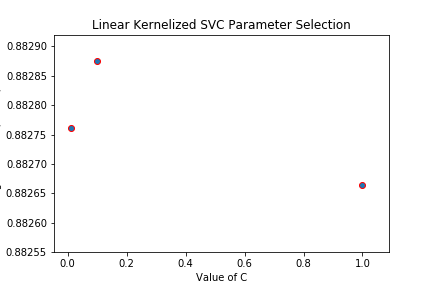

Text(0.5,0,'Value of C')

Text(0,0.5,'Avg Tset Score(cv = 5) ')

Text(0.5,1,'Linear Kernelized SVC Parameter Selection')

In [55]:
%matplotlib notebook 
plt.scatter(svc_l_C_param_grid['C'],grid_svc_l_C.cv_results_['mean_test_score'],edgecolors = 'r')
plt.xlabel('Value of C')
plt.ylabel('Avg Tset Score(cv = 5) ')
plt.title('Linear Kernelized SVC Parameter Selection')
plt.show()

In [56]:
y_svc_l_C_predict = grid_svc_l_C.predict(X_test_C)
y_svc_l_C_train_predict = grid_svc_l_C.predict(X_train_C)

Text(0.5,0,'FPR')

Text(0,0.5,'TPR (recall)')

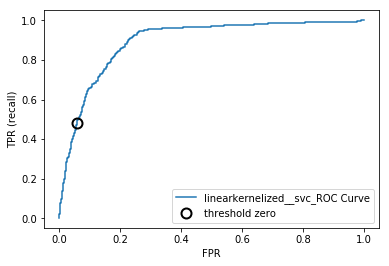

In [57]:
%matplotlib inline
from sklearn.metrics import roc_curve

l_svc_fpr, l_svc_tpr, l_svc_thresholds = roc_curve(y_test_C, grid_svc_l_C.decision_function(X_test_C))

plt.plot(l_svc_fpr, l_svc_tpr, label="linearkernelized__svc_ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

l_svc_close_zero = np.argmin(np.abs(l_svc_thresholds))
plt.plot(l_svc_fpr[l_svc_close_zero], l_svc_tpr[l_svc_close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [58]:
report_table_svc_l_C = [['Linear Kernelized SVC',grid_svc_l_C.best_params_, grid_svc_l_C.score(X_train_C, y_train_C), grid_svc_l_C.score(X_test_C, y_test_C), roc_auc_score(y_svc_l_C_train_predict, y_train_C), roc_auc_score(y_svc_l_C_predict, y_test_C) ]]
report_table_svc_l_C

[['Linear Kernelized SVC',
  {'C': 0.1},
  0.8844615321415396,
  0.8932264242955381,
  0.7748388781752804,
  0.784847737815588]]

##### RBF Kernelized SVM

In [59]:
from sklearn.svm import SVC

svc_k_C = SVC(kernel='rbf')
svc_k_C_param_grid = {'C': [ 0.1, 1, 10, 100, 1000, 10000 ],
              'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

grid_svc_k_C = GridSearchCV(svc_k_C, svc_k_C_param_grid, cv = 5, scoring='roc_auc')

grid_svc_k_C.fit(X_train_C, y_train_C)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000, 10000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [60]:
grid_svc_k_C.best_params_
grid_svc_k_C.cv_results_['mean_train_score']
grid_svc_k_C.cv_results_['mean_test_score']

{'C': 10000, 'gamma': 0.01}

array([0.88326611, 0.88437306, 0.88425267, 0.88510397, 0.88615551,
       0.88179736, 0.88415652, 0.88421223, 0.88440829, 0.88484771,
       0.89057836, 0.90458446, 0.88424904, 0.88425571, 0.8840882 ,
       0.88584362, 0.89664109, 0.93088414, 0.88424435, 0.88393712,
       0.88384093, 0.8929113 , 0.90479242, 0.95303653, 0.88391755,
       0.8833093 , 0.88593358, 0.894216  , 0.91377227, 0.96892446,
       0.88327741, 0.88356394, 0.89254468, 0.89658792, 0.92587816,
       0.98002698])

array([0.88144328, 0.88335971, 0.88275576, 0.88339982, 0.88297443,
       0.86766616, 0.88277448, 0.88280415, 0.88282502, 0.88315403,
       0.88426029, 0.86613542, 0.88288714, 0.8828338 , 0.88300228,
       0.88264266, 0.88234832, 0.84253731, 0.88285159, 0.88292523,
       0.88251513, 0.88736978, 0.87459306, 0.81714446, 0.88292624,
       0.88232423, 0.88265813, 0.88421728, 0.85831022, 0.79466981,
       0.88237859, 0.88217605, 0.88797695, 0.87664425, 0.83586405,
       0.7870458 ])

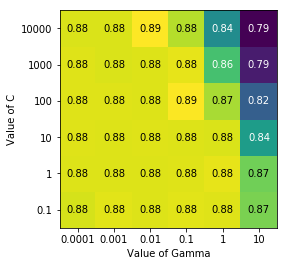

In [61]:
grid_svc_k_C_scores = np.array(grid_svc_k_C.cv_results_['mean_test_score']).reshape(6, 6)
mg.tools.heatmap(grid_svc_k_C_scores, xlabel='Value of Gamma', xticklabels=svc_k_C_param_grid['gamma'], ylabel='Value of C', yticklabels=svc_k_C_param_grid['C'], cmap="viridis")

In [62]:
y_svc_k_C_predict = grid_svc_k_C.predict(X_test_C)
y_svc_k_C_train_predict = grid_svc_k_C.predict(X_train_C)

Text(0.5,0,'FPR')

Text(0,0.5,'TPR (recall)')

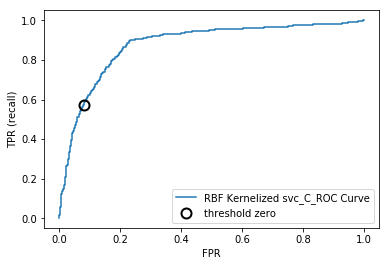

In [63]:
from sklearn.metrics import roc_curve

svc_k_C_fpr, svc_k_C_tpr, svc_k_C_thresholds = roc_curve(y_test_C, grid_svc_k_C.decision_function(X_test_C))

plt.plot(svc_k_C_fpr, svc_k_C_tpr, label="RBF Kernelized svc_C_ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

svc_k_C_close_zero = np.argmin(np.abs(svc_k_C_thresholds))
plt.plot(svc_k_C_fpr[svc_k_C_close_zero], svc_k_C_tpr[svc_k_C_close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [64]:
report_table_svc_k_C = [['RBF SVC', grid_svc_k_C.best_params_, grid_svc_k_C.score(X_train_C, y_train_C), grid_svc_k_C.score(X_test_C, y_test_C), roc_auc_score(y_svc_k_C_train_predict, y_train_C), roc_auc_score(y_svc_k_C_predict, y_test_C) ]]
report_table_svc_k_C

[['RBF SVC',
  {'C': 10000, 'gamma': 0.01},
  0.8926066282568732,
  0.8766988713063022,
  0.766263835415714,
  0.7802815802269529]]

##### Polynomial Kernelized SVM

In [65]:
from sklearn.svm import SVC

svc_p_C = SVC(kernel='poly')
svc_p_C_param_grid = {'C': [0.1, 1, 10, 100, 1000, 10000 ],
              'degree': [1,2,3]}

grid_svc_p_C = GridSearchCV(svc_p_C, svc_p_C_param_grid, cv = 5, scoring='roc_auc')

grid_svc_p_C.fit(X_train_C, y_train_C)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000, 10000], 'degree': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [66]:
grid_svc_p_C.best_params_
grid_svc_p_C.cv_results_['mean_train_score']
grid_svc_p_C.cv_results_['mean_test_score']

{'C': 1000, 'degree': 2}

array([0.88422027, 0.88324605, 0.87948719, 0.88437954, 0.88331939,
       0.87960266, 0.88329125, 0.88463642, 0.88358656, 0.88302672,
       0.88726773, 0.88656078, 0.88289261, 0.88904363, 0.89019965,
       0.88283025, 0.88881994, 0.89145538])

array([0.88279634, 0.88117711, 0.87707977, 0.88289994, 0.88121474,
       0.87712063, 0.88244384, 0.882171  , 0.88099351, 0.88203579,
       0.88261429, 0.88134091, 0.8819286 , 0.88336799, 0.88029213,
       0.88195626, 0.88129358, 0.87475878])

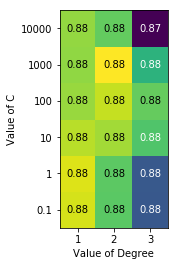

In [67]:
grid_svc_p_C_scores = np.array(grid_svc_p_C.cv_results_['mean_test_score']).reshape(6, 3)
mg.tools.heatmap(grid_svc_p_C_scores, xlabel='Value of Degree', xticklabels=svc_p_C_param_grid['degree'], ylabel='Value of C', yticklabels=svc_p_C_param_grid['C'], cmap="viridis")

In [68]:
y_svc_p_C_predict = grid_svc_p_C.predict(X_test_C)
y_svc_p_C_train_predict = grid_svc_p_C.predict(X_train_C)

Text(0.5,0,'FPR')

Text(0,0.5,'TPR (recall)')

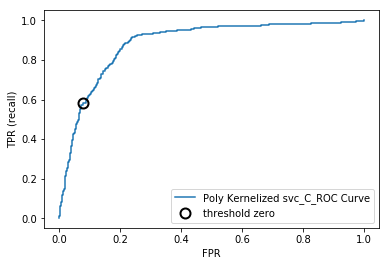

In [69]:
from sklearn.metrics import roc_curve

svc_p_C_fpr, svc_p_C_tpr, svc_p_C_thresholds = roc_curve(y_test_C, grid_svc_p_C.decision_function(X_test_C))

plt.plot(svc_p_C_fpr, svc_p_C_tpr, label="Poly Kernelized svc_C_ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

svc_p_C_close_zero = np.argmin(np.abs(svc_p_C_thresholds))
plt.plot(svc_p_C_fpr[svc_p_C_close_zero], svc_p_C_tpr[svc_p_C_close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [70]:
report_table_svc_p_C = [['Poly SVC', grid_svc_p_C.best_params_, grid_svc_p_C.score(X_train_C, y_train_C), grid_svc_p_C.score(X_test_C, y_test_C), roc_auc_score(y_svc_p_C_train_predict, y_train_C), roc_auc_score(y_svc_p_C_predict, y_test_C) ]]
report_table_svc_p_C

[['Poly SVC',
  {'C': 1000, 'degree': 2},
  0.8885410914480144,
  0.8846340049897167,
  0.7616114157708699,
  0.7792907575516271]]

##### Decision Tree Classification

In [71]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree_param_grid = {'max_depth':[1, 2, 3, 4, 5, 6]}

grid_tree = GridSearchCV(tree, tree_param_grid, cv = 5, scoring='roc_auc')

grid_tree.fit(X_train_C, y_train_C)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [72]:
grid_tree.best_params_
grid_tree.cv_results_['mean_train_score']
grid_tree.cv_results_['mean_test_score']

{'max_depth': 5}

array([0.82234159, 0.8779556 , 0.89480923, 0.90788491, 0.917204  ,
       0.92757589])

array([0.8208701 , 0.87394233, 0.88764417, 0.89258194, 0.894405  ,
       0.88497312])

<IPython.core.display.Javascript object>


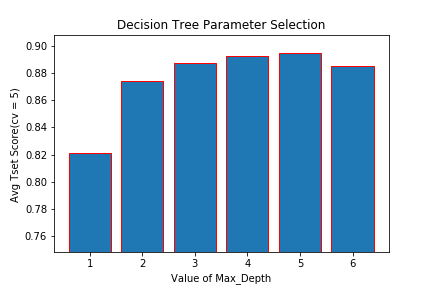

<BarContainer object of 6 artists>

Text(0.5,0,'Value of Max_Depth')

Text(0,0.5,'Avg Tset Score(cv = 5) ')

Text(0.5,1,'Decision Tree Parameter Selection')

In [74]:
%matplotlib notebook
plt.bar(tree_param_grid['max_depth'],grid_tree.cv_results_['mean_test_score'], edgecolor = 'r')
plt.xlabel('Value of Max_Depth')
plt.ylabel('Avg Tset Score(cv = 5) ')
plt.title('Decision Tree Parameter Selection')
plt.show()

In [133]:
y_tree_predict = grid_tree.predict(X_test_C)
y_tree_train_predict = grid_tree.predict(X_train_C)

Text(0.5,1,'Decision Tree Confusion matrix')

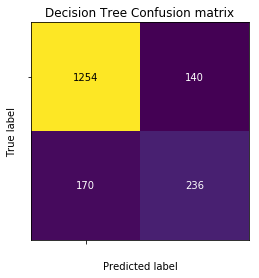

In [76]:
%matplotlib inline
tree_scores_image = mg.tools.heatmap(confusion_matrix(y_test_C, y_tree_predict), 
                                       xlabel='Predicted label',ylabel='True label', 
                                       xticklabels=' ',yticklabels=' ',
                                       cmap="viridis", fmt="%d")
plt.title("Decision Tree Confusion matrix")
plt.gca().invert_yaxis()

In [134]:
report_table_tree = [['Decision Tree', grid_tree.best_params_, grid_tree.score(X_train_C, y_train_C), grid_tree.score(X_test_C, y_test_C), roc_auc_score(y_tree_train_predict, y_train_C), roc_auc_score(y_tree_predict, y_test_C) ]]
report_table_tree

[['Decision Tree',
  {'max_depth': 5},
  0.9156953618317885,
  0.8850509926426414,
  0.7987267781840924,
  0.7541387759980874]]

##### Random Forest

In [109]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf_param_grid = { 'bootstrap': [True,False],
                   'max_depth': [13, 15, 17],
                   'max_features': [7, 8],
                   'min_samples_leaf': [15, 20, 25],
                   'n_estimators': [100, 200, 300]}

grid_rf = GridSearchCV(rf, rf_param_grid, cv = 5, scoring='roc_auc', n_jobs = -1)

grid_rf.fit(X_train_C, y_train_C)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [True, False], 'max_depth': [13, 15, 17], 'max_features': [7, 8], 'min_samples_leaf': [15, 20, 25], 'n_estimators': [100, 200, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [111]:
grid_rf.best_params_

{'bootstrap': True,
 'max_depth': 13,
 'max_features': 7,
 'min_samples_leaf': 15,
 'n_estimators': 200}

In [135]:
y_rf_predict = grid_rf.predict(X_test_C)
y_rf_train_predict = grid_rf.predict(X_train_C)

Text(0.5,1,'Random Forest Confusion matrix')

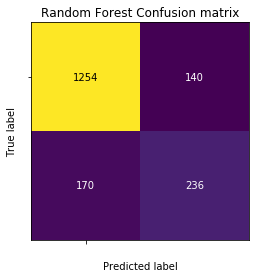

In [113]:
%matplotlib inline
rf_scores_image = mg.tools.heatmap(confusion_matrix(y_test_C, y_rf_predict), 
                                       xlabel='Predicted label',ylabel='True label', 
                                       xticklabels=' ',yticklabels=' ',
                                       cmap="viridis", fmt="%d")
plt.title("Random Forest Confusion matrix")
plt.gca().invert_yaxis()

In [136]:
report_table_rf = [['Random Forest', grid_rf.best_params_, grid_rf.score(X_train_C, y_train_C), grid_rf.score(X_test_C, y_test_C), roc_auc_score(y_rf_train_predict, y_train_C), roc_auc_score(y_rf_predict, y_test_C) ]]
report_table_rf

[['Random Forest',
  {'bootstrap': True,
   'max_depth': 13,
   'max_features': 7,
   'min_samples_leaf': 15,
   'n_estimators': 200},
  0.9491958986366973,
  0.8992197383579166,
  0.8467760068634149,
  0.7675703090262339]]

##### AdaBoost

In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

ABC_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2]}

DTC = DecisionTreeClassifier(random_state = 11,max_depth = None)
ABC = AdaBoostClassifier(base_estimator = DTC)

grid_ABC = GridSearchCV(ABC, ABC_param_grid, cv = 5, scoring='roc_auc', n_jobs = -1)

grid_ABC.fit(X_train_C, y_train_C)

GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=11,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'base_estimator__criterion': ['gini', 'entropy'], 'base_estimator__splitter': ['best', 'random'], 'n_estimators': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [116]:
grid_ABC.best_params_
grid_ABC.cv_results_['mean_train_score']
grid_ABC.cv_results_['mean_test_score']

{'base_estimator__criterion': 'gini',
 'base_estimator__splitter': 'best',
 'n_estimators': 2}

array([1., 1., 1., 1., 1., 1., 1., 1.])

array([0.72360596, 0.72413767, 0.71052195, 0.71666323, 0.71987418,
       0.72057692, 0.70119986, 0.71817085])

In [137]:
y_ABC_predict = grid_ABC.predict(X_test_C)
y_ABC_train_predict = grid_ABC.predict(X_train_C)

Text(0.5,1,'AdaBoost Confusion matrix')

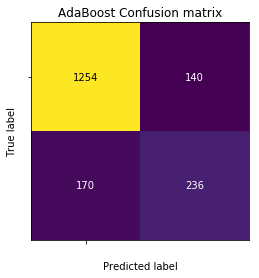

In [118]:
%matplotlib inline
rf_scores_image = mg.tools.heatmap(confusion_matrix(y_test_C, y_ABC_predict), 
                                       xlabel='Predicted label',ylabel='True label', 
                                       xticklabels=' ',yticklabels=' ',
                                       cmap="viridis", fmt="%d")
plt.title("AdaBoost Confusion matrix")
plt.gca().invert_yaxis()

In [138]:
report_table_ABC = [['AdaBoost', grid_ABC.best_params_, grid_ABC.score(X_train_C, y_train_C), grid_ABC.score(X_test_C, y_test_C), roc_auc_score(y_ABC_train_predict, y_train_C), roc_auc_score(y_ABC_predict, y_test_C) ]]
report_table_ABC

[['AdaBoost',
  {'base_estimator__criterion': 'gini',
   'base_estimator__splitter': 'best',
   'n_estimators': 2},
  1.0,
  0.7095186266264286,
  1.0,
  0.6981617647058823]]

##### Gradient Boosting

In [125]:
from sklearn.ensemble import GradientBoostingClassifier

GDBT_param_grid = { "loss":["deviance"],
    "learning_rate": [0.01, 0.1, 0.2],
    "min_samples_leaf": [10, 20, 30],
    "max_depth":[3,4],
    "max_features":[7],
   #"criterion": ["friedman_mse",  "mae"],
    "n_estimators":[50, 100, 200]}

GDBT = GradientBoostingClassifier()

grid_GDBT = GridSearchCV(GDBT, GDBT_param_grid, cv = 5, scoring='roc_auc', n_jobs = -1)

grid_GDBT.fit(X_train_C, y_train_C)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'loss': ['deviance'], 'learning_rate': [0.01, 0.1, 0.2], 'min_samples_leaf': [10, 20, 30], 'max_depth': [3, 4], 'max_features': [7], 'n_estimators': [50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [123]:
grid_GDBT.best_params_

{'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 4,
 'max_features': 7,
 'min_samples_leaf': 20,
 'n_estimators': 100}

In [139]:
y_GDBT_predict = grid_GDBT.predict(X_test_C)
y_GDBT_train_predict = grid_GDBT.predict(X_train_C)

Text(0.5,1,'GDBT Confusion matrix')

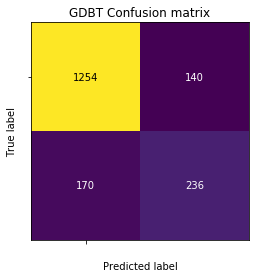

In [127]:
%matplotlib inline
rf_scores_image = mg.tools.heatmap(confusion_matrix(y_test_C, y_GDBT_predict), 
                                       xlabel='Predicted label',ylabel='True label', 
                                       xticklabels=' ',yticklabels=' ',
                                       cmap="viridis", fmt="%d")
plt.title("GDBT Confusion matrix")
plt.gca().invert_yaxis()

In [140]:
report_table_GDBT = [['GDBT', grid_GDBT.best_params_, grid_GDBT.score(X_train_C, y_train_C), grid_GDBT.score(X_test_C, y_test_C), roc_auc_score(y_GDBT_train_predict, y_train_C), roc_auc_score(y_GDBT_predict, y_test_C) ]]
report_table_GDBT

[['GDBT',
  {'learning_rate': 0.1,
   'loss': 'deviance',
   'max_depth': 4,
   'max_features': 7,
   'min_samples_leaf': 20,
   'n_estimators': 50},
  0.9343816236551239,
  0.8967805372779895,
  0.8243674867437343,
  0.7691335037794574]]

#### Result Campare

In [141]:
report_C = pd.DataFrame(report_table_knnC + report_table_logreg + report_table_svc_lin_C + report_table_svc_l_C + report_table_svc_k_C + report_table_svc_p_C + report_table_tree + report_table_rf + report_table_ABC + report_table_GDBT,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'Train auc score', 'Test auc score'])
report_C

,Model name,Model parameter,Train accuracy,Test accuracy,Train auc score,Test auc score
0,knn,{'n_neighbors': 40},0.897715,0.888910,0.777532,0.764253
1,Logistic Reg,{'C': 1000},0.885423,0.889622,0.757945,0.780024
2,Linear SVC,{'C': 10},0.885876,0.886452,0.757039,0.779000
3,Linear Kernelized SVC,{'C': 0.1},0.884462,0.893226,0.774839,0.784848
4,RBF SVC,"{'C': 10000, 'gamma': 0.01}",0.892607,0.876699,0.766264,0.780282
5,Poly SVC,"{'C': 1000, 'degree': 2}",0.888541,0.884634,0.761611,0.779291
6,Decision Tree,{'max_depth': 5},0.915695,0.885051,0.798727,0.754139
7,Random Forest,"{'bootstrap': True, 'max_depth': 13, 'max_feat...",0.949196,0.899220,0.846776,0.767570
8,AdaBoost,"{'base_estimator__criterion': 'gini', 'base_es...",1.000000,0.709519,1.000000,0.698162
9,GDBT,"{'learning_rate': 0.1, 'loss': 'deviance', 'ma...",0.934382,0.896781,0.824367,0.769134


## Fit the Model With Whole Dataset

In [ ]:
from sklearn.svm import SVC
SVC_L = SVC(kernel='linear', C = 0.1)
grid_svc_l_C.fit(data_feature, data_target_C)